<a href="https://colab.research.google.com/github/Nikkuchan/CpE-AIML/blob/main/58089_LabNo03_Wagler/58089_LabNo03_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [69]:
### YOUR CODE HERE
class LinearRegression_Simple():
 
  ## Coding covariances
  def covariance(self,vectA,vectB):
    covariance = np.round(np.cov(vectA,vectB),2)
    return covariance[0,1]

  ## Coding Pearsons Correlation
  def pearsons_r(self,vectA,vectB):
    R = np.round(np.corrcoef(vectA,vectB)[0,1],3)
    return R
  
  ## Coding the Weights of the Linear Regression
  def train(self,X,y):
    # compute for the std.dev of X and y
    std_X, std_y = np.std(X), np.std(y)
    # compute for Pearson's R
    rho = np.corrcoef(X,y)[0,1]
    # compute for the weights of the bias term
    w1 = rho*(std_y/std_X)
    # compute for the weights of the feature
    w0 = y.mean()-w1*X.mean()
    rndwt = np.round((w1,w0),2)
    return rndwt

  # passing the train method to model_ method
  def __init__(self):
    self.model_ = self.train(X,y)

  ## Getting the Predicted Value  
  def predict(self,x):
    std_X, std_y = np.std(X), np.std(y) # compute for the std.dev of X and y
    rho = np.corrcoef(X,y)[0,1]         # compute for Pearson's R
    w1 = rho*(std_y/std_X)              # compute for the weights of the bias term
    w0 = y.mean()-w1*X.mean()           # compute for the weights of the feature
    preds = np.round(np.array(w0+w1*x),2)
    return preds.reshape(-1,1)

  ## Metrics for test 6
  def evaluate(self):
    n = y.size
    n_X = X.size
    k = 1
    y_hat = self.predict(X).reshape(1,n_X)
    sst = np.sum(np.square(y-y.mean()))     #Sum of Squares Total
    ssr = np.sum(np.square(y_hat-y.mean())) #Sum of Squares Regression
    sse = np.sum(np.square(y_hat-y))        #Sum of Squares Error
    mse = np.mean(np.square(y_hat-y))       #Mean of Squared Error
    rmse = np.sqrt(mse)                     #Root Mean Squared Error
    r2 = (1-(sse/sst))                      #R-squared
    ar2 = (1-((1-r2)*(n-1)/(n-k-1)))        #Adjusted R-squared
    dictionary = {'Sum of Squares Total      [SST] ': [sst],
                  'Sum of Squares Regression [SSR] ': [ssr],
                  'Sum of Squares Error      [SSE] ': [sse],
                  'Mean of Squared Error     [MSE] ': [mse],
                  'Root Mean Squared Error   [RMSE]': [rmse],
                  'R-squared                 [R²]  ': [r2],
                  'Adjusted R-squared        [AR²] ': [ar2]}
    return dictionary

  ## Coding visualization
  def visualize(self):    
   std_X = np.std(X)
   std_y = np.std(y)
   rho = np.corrcoef(X,y)[0,1]
   w1 = rho*(std_y/std_X)
   w0 = y.mean() - w1*X.mean()
   model_ = w0 + w1*X
   plt.figure(figsize=(5,5), dpi=400)
   plt.grid()
   plt.scatter(X,y)
   plt.plot(X, model_)
   plt.savefig("Linear Regression.jpg")
   plt.show()

  ### You may add other helper functions in to make your code cleaner

In [57]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [58]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [59]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

-456.66

Expected output value:
$$cov_{x,y} = -456.66$$

In [60]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

-0.905

Expected output value:
$$r = -0.90$$

In [61]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([-0.54, -9.38])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54  -9.38\end{bmatrix}$$

In [62]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

array([[-63.64],
       [-64.18],
       [-64.72],
       [-65.26],
       [-65.81]])

Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [63]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared        [AR²] ': [0.8173133937556119],
 'Mean of Squared Error     [MSE] ': [54.151509531660146],
 'R-squared                 [R²]  ': [0.8191587130106057],
 'Root Mean Squared Error   [RMSE]': [7.358770925342094],
 'Sum of Squares Error      [SSE] ': [5415.150953166015],
 'Sum of Squares Regression [SSR] ': [24529.359800062088],
 'Sum of Squares Total      [SST] ': [29944.21817780801]}

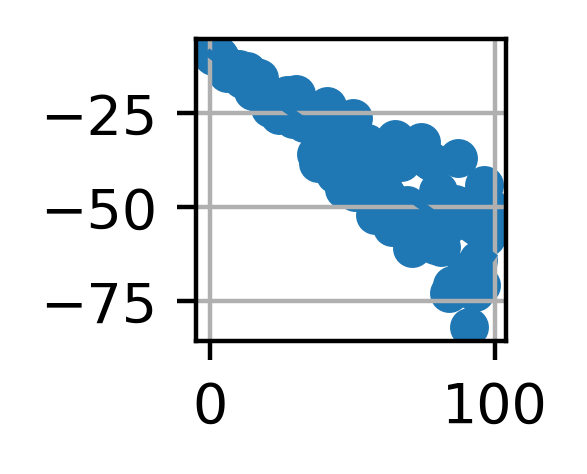

In [68]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()